### imports:
    - os - for building file paths
    - numpy - for file i/o
    - xrsdkit.system - for specifying scatterer populations and fitting parameters
    - xrsdkit.visualization - for plotting patterns
    - xrsdkit.tools.ymltools - for saving the output file

In [1]:
import os

import numpy as np
from xrsdkit import system as xrsdsys
from xrsdkit import visualization as xrsdvis
from xrsdkit.tools import ymltools as xrsdyml

%matplotlib inline

### read and inspect scattering data:

After reading the scattering data, the file name is saved,
so that it can be referenced later and re-used to name the output file.

In [2]:
data_dir = os.path.join('..','tutorial_dataset','tutorial_1')
q_I_path = os.path.join(data_dir,'R5_1stcool_0009_dz_bgsub.dat')
data_file = os.path.split(q_I_path)[1]
data_file_name = os.path.splitext(data_file)[0]
output_file = data_file_name+'.yml'
output_path = os.path.join(data_dir,output_file)
q_I = np.loadtxt(q_I_path)
print('input file: {}'.format(q_I_path))
print('output_file: {}'.format(output_path))

input file: ../tutorial_dataset/tutorial_1/R5_1stcool_0009_dz_bgsub.dat
output_file: ../tutorial_dataset/tutorial_1/R5_1stcool_0009_dz_bgsub.yml


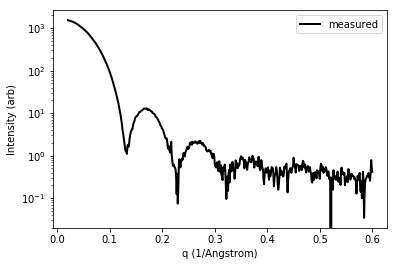

In [3]:
mpl_fig, _ = xrsdvis.plot_xrsd_fit(sys=None,q=q_I[:,0],I=q_I[:,1])

### specify populations, noise model, and metadata:

The sample and measurement are described by a single xrsdkit.system.System object.
The construction of this object can be fairly complex.
For details of System construction,
see the documentation at https://xrsdkit.readthedocs.io/en/latest/.

As the System is specified, parameter values can be assigned.
The values assigned here are estimated by trial and error,
to get the computed intensity close enough to the measured intensity,
to provide a good starting point for optimization

After the System is specified, the computed and measured intensities are compared,
by re-drawing on the axes from the plot generated above.

In [4]:
particles = xrsdsys.System(
                noise=dict(
                    model='flat',
                    parameters={'I0':{'value':0.1}}
                ),
                spheres=dict(
                    structure='diffuse',
                    form='spherical',
                    settings={'distribution':'r_normal'},
                    parameters=dict(
                        I0={'value':1000},
                        r={'value':35.},
                        sigma={'value':0.05},
                    )
                ),
                sample_metadata=dict(
                    experiment_id='tutorial_1',
                    sample_id='tutorial_1_sample_0',
                    data_file=data_file,
                    source_wavelength=0.9
                )
)

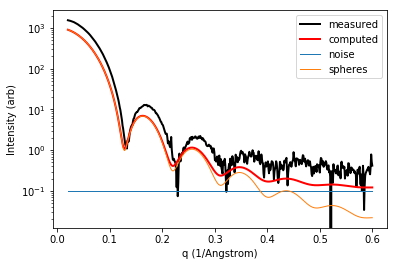

In [5]:
xrsdvis.draw_xrsd_fit(mpl_fig.gca(),sys=particles,q=q_I[:,0],I=q_I[:,1])
mpl_fig

### fit parameters:

Assuming a reasonable starting point was found during System specification,
xrsdsys.fit should be able to optimize the parameters objectively.
A fit_report dict gets attached to the optimized System object,
to provide information about the outcome of the fit. 
Note that the fit_report dict, by default, gives good_fit==False,
even if the fit is very good.
This has to be changed manually, to avoid accidentally assigning good_fit==True.

After the fit, the intensity plot is redrawn one last time for final inspection.

In [6]:
particles_opt = xrsdsys.fit(particles,q_I[:,0],q_I[:,1])
particles_opt.fit_report

{'converged': True,
 'error_weighted': True,
 'final_objective': 0.0004563671987039571,
 'fit_snr': 23.386597638044684,
 'good_fit': False,
 'initial_objective': 0.3918161472136642,
 'logI_weighted': True,
 'q_range': [0.0, inf]}

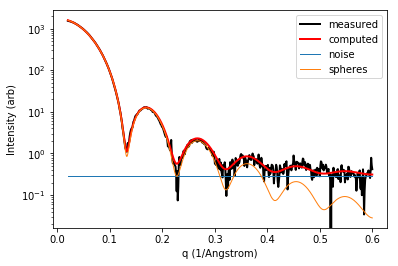

In [7]:
xrsdvis.draw_xrsd_fit(mpl_fig.gca(),sys=particles_opt,q=q_I[:,0],I=q_I[:,1])
mpl_fig

### save results:

If the fit result is satisfactory,
the good_fit field in the System fit_report should be updated to reflect this.
Then, the System is serialized to a file (YAML format),
and saved alongside its intensity pattern. 
Finally, the System object is translated to a dict and printed out,
for inspection of final parameter values and metadata.

In [8]:
particles_opt.fit_report['good_fit'] = True
output_path
xrsdyml.save_sys_to_yaml(output_path,particles_opt)

In [9]:
import pprint
pprint.pprint(particles_opt.to_dict())

{'features': OrderedDict([('Imax_over_Imean', 14.110102889960455),
                          ('Ilowq_over_Imean', 8.976013799582095),
                          ('Imax_sharpness', 1.00463052328044),
                          ('I_fluctuation', 0.02583117133830509),
                          ('logI_fluctuation', 4.5585110006155505),
                          ('logI_max_over_std', 2.861989130621556),
                          ('r_fftIcentroid', 0.10045042805088268),
                          ('q_Icentroid', 0.0494752587013213),
                          ('q_logIcentroid', -0.11564590627858842),
                          ('pearson_q', -0.5372271678689402),
                          ('pearson_q2', -0.3899591943362617),
                          ('pearson_expq', -0.49547656769245374),
                          ('pearson_invexpq', 0.579495019705841),
                          ('q_best_hump', 0.009948775877582805),
                          ('q_best_trough', 0.1343078594684406),
               